# **ISP Customer Churn Analysis**

## **Overview**  
This notebook explores customer churn patterns for an Internet Service Provider (ISP) using data analysis and visualization techniques. The goal is to identify key factors influencing customer retention and churn, helping the company develop data-driven strategies to reduce churn rates.  

## **Key Steps Covered:**  
### 1. **Data Loading & Preprocessing:**  
- Read the dataset and inspect its structure.  
- Handle missing values in churn-related columns.  
- Drop unnecessary columns for cleaner analysis.  

### 2. **Exploratory Data Analysis (EDA):**  
- Analyze customer demographics and account details.  
- Visualize relationships between key variables (e.g., Monthly Charge vs. Total Charges).  

### 3. **Churn Analysis:**  
- Investigate churn rates based on contract type, payment method, and customer service interactions.  
- Identify high-risk customer segments and potential retention strategies.  

### 4. **Demographic Insights:**  
- Analyze customer churn by age group, gender distribution, and tenure length.  

## **Key Insights & Business Actions:**  
- **Month-to-month contracts** have the highest churn → Offer incentives for long-term contracts.  
- **Electronic check users** are more likely to churn → Promote auto-pay for retention.  
- **Frequent customer service calls** indicate dissatisfaction → Improve support and first-call resolution.  

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Documents\School\BDS\JAN 2025\MACHINE LEARNING\ISP Data.csv")  
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

In [3]:
df.shape

(6687, 29)

In [4]:
df.columns

Index(['Customer ID', 'Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
       'State', 'Phone Number', 'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.isnull().sum()

Customer ID                             0
Churn Label                             0
Account Length (in months)              0
Local Calls                             0
Local Mins                              0
Intl Calls                              0
Intl Mins                               0
Intl Active                             0
Intl Plan                               0
Extra International Charges             0
Customer Service Calls                  0
Avg Monthly GB Download                 0
Unlimited Data Plan                     0
Extra Data Charges                      0
State                                   0
Phone Number                            0
Gender                                  0
Age                                     0
Under 30                                0
Senior                                  0
Group                                   0
Number of Customers in Group            0
Device Protection & Online Backup       0
Contract Type                     

In [6]:
# Fill missing values in churn-related columns
df["Churn Category"].fillna("Non Churned", inplace=True)
df["Churn Reason"].fillna("Non Churned", inplace=True)

# Verify that missing values are filled
df[["Churn Category", "Churn Reason"]].isnull().sum()


Churn Category    0
Churn Reason      0
dtype: int64

In [7]:
missing_cols = df.columns[df.isnull().any()]
print(df["Churn Reason"].sample(10))

80                        Non Churned
6517                      Non Churned
3206                      Non Churned
5547                      Non Churned
5760                      Non Churned
2152                      Non Churned
4316          Product dissatisfaction
5115    Competitor had better devices
3052                      Non Churned
6413                      Non Churned
Name: Churn Reason, dtype: object


In [8]:
missing_cols = df.columns[df.isnull().any()]
print(df["Churn Category"].sample(10))

98      Non Churned
1570    Non Churned
2484    Non Churned
3954       Attitude
6143    Non Churned
1217    Non Churned
873     Non Churned
1963    Non Churned
5585    Non Churned
1338    Non Churned
Name: Churn Category, dtype: object


In [9]:
df.drop(['State',], axis=1, inplace=True)
df.head()

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,Non Churned,Non Churned
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,Non Churned,Non Churned
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,Non Churned,Non Churned
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,Non Churned,Non Churned
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,Non Churned,Non Churned


# DATA VISULIZATION

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

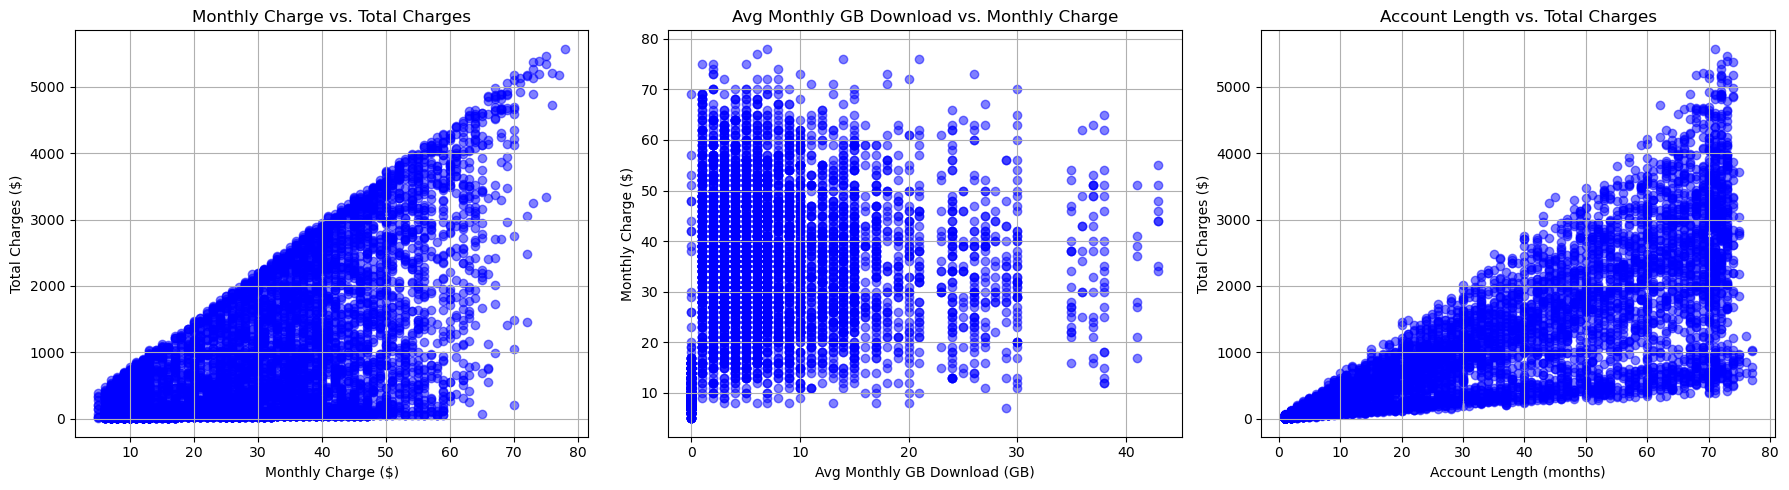

In [11]:
def scatter_plot(ax, x, y, xlabel, ylabel, title):
    ax.scatter(df[x], df[y], alpha=0.5, color="blue")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scatter_plot(axes[0], "Monthly Charge", "Total Charges", "Monthly Charge ($)", "Total Charges ($)", "Monthly Charge vs. Total Charges")
scatter_plot(axes[1], "Avg Monthly GB Download", "Monthly Charge", "Avg Monthly GB Download (GB)", "Monthly Charge ($)", "Avg Monthly GB Download vs. Monthly Charge")
scatter_plot(axes[2], "Account Length (in months)", "Total Charges", "Account Length (months)", "Total Charges ($)", "Account Length vs. Total Charges")

plt.tight_layout()
plt.show()

# Churn Analysis: Contract Type, Payment Method, and Customer Service Calls  (H1)

## 1️⃣ Churn Rate by Contract Type (H2)
### ✅ Findings:
- Customers on **Month-to-Month contracts** show the **highest churn rate**.  
- **One-year and two-year contracts** have significantly **lower churn rates**.  

## 2️⃣ Churn Rate by Payment Method (H2)
### ✅ Findings:
- Customers using **Electronic Check payments** have the **highest churn rate**.  
- Those using **Credit Cards and Auto-Pay** have significantly **lower churn rates**.  

## 3️⃣ Churn vs. Customer Service Calls (H2)
### ✅ Findings:
- Customers with **0-1 customer service calls** have **low churn rates**.  
- Churn **increases sharply** as the number of support calls **rises**.  
- Customers who made **4+ service calls** have the **highest churn rate**.  

## 📌 Overall Takeaways (H2)
🔹 **Month-to-Month contracts have the highest churn → Offer incentives for longer contracts.**  
🔹 **Electronic Check users churn the most → Encourage Auto-Pay for stability.**  
🔹 **High customer service calls indicate dissatisfaction → Improve support to retain customers.**


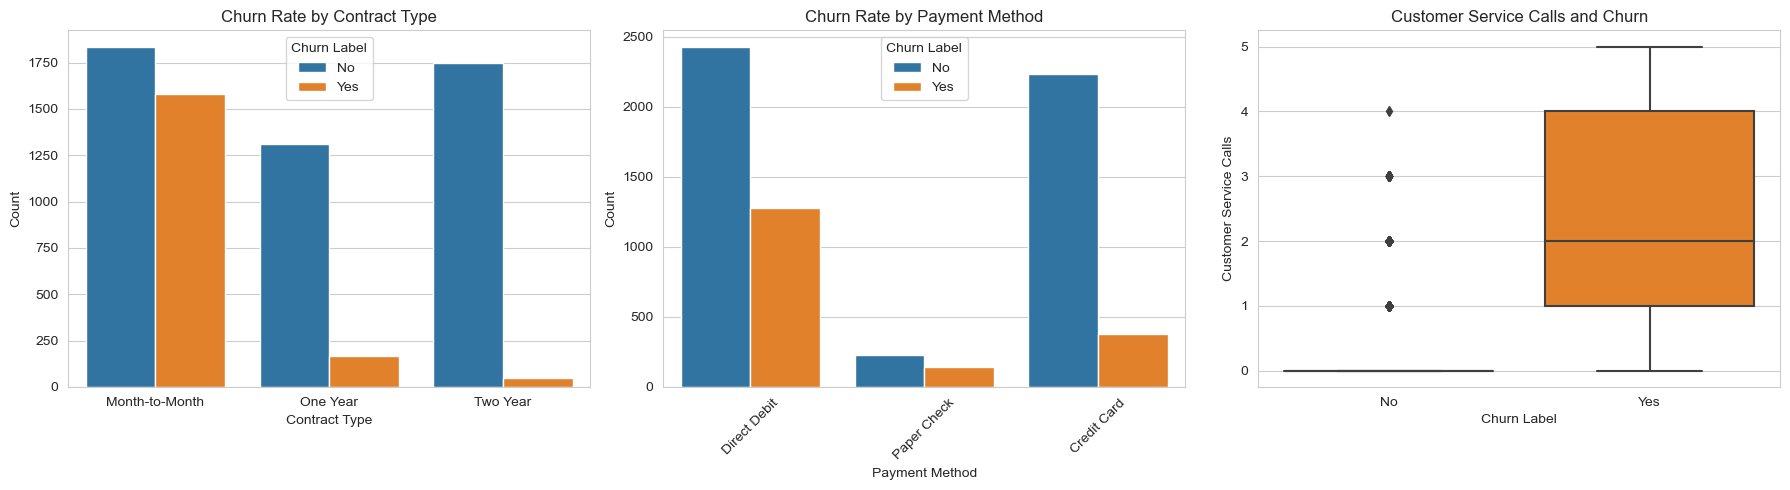

In [12]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots for churn analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Churn Rate by Contract Type
sns.countplot(x="Contract Type", hue="Churn Label", data=df, ax=axes[0])
axes[0].set_title("Churn Rate by Contract Type")
axes[0].set_xlabel("Contract Type")
axes[0].set_ylabel("Count")

# Churn Rate by Payment Method
sns.countplot(x="Payment Method", hue="Churn Label", data=df, ax=axes[1])
axes[1].set_title("Churn Rate by Payment Method")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Churn Rate vs. Customer Service Calls
sns.boxplot(x="Churn Label", y="Customer Service Calls", data=df, ax=axes[2])
axes[2].set_title("Customer Service Calls and Churn")
axes[2].set_xlabel("Churn Label")
axes[2].set_ylabel("Customer Service Calls")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## 1️⃣ Churn Rate by Contract Type (Bar Chart)

✅ Findings:
Customers on Month-to-Month contracts show the highest churn rate.
One-year and two-year contracts have significantly lower churn rates.
✅ Possible Reasons:
Flexibility: Month-to-month contracts allow customers to leave without penalties, making them more likely to churn.
Commitment: One-year and two-year contracts lock customers in, reducing churn due to cancellation fees or loyalty incentives.
Perceived value: Longer contracts may include discounts or perks, making them more appealing for long-term customers.
🔎 Actionable Insights:
Encourage longer contracts by offering incentives such as discounted rates, free upgrades, or exclusive perks for committing to a 1- or 2-year plan.
Improve month-to-month retention by offering better customer experiences, personalized offers, or loyalty rewards.
Identify at-risk month-to-month customers based on usage patterns and proactively offer retention deals.
##   2️⃣ Churn Rate by Payment Method (Bar Chart)

✅ Findings:
Customers using Electronic Check payments have the highest churn rate.
Those using Credit Cards and Auto-Pay have significantly lower churn rates.
✅ Possible Reasons:
Manual payments (e.g., electronic check) require customers to take action every billing cycle, increasing the chance of missed payments or service cancellations.
Auto-pay methods (Credit Card, Bank Transfer) reduce friction, ensuring payments go through automatically, leading to longer retention.
Some customers may have security concerns about storing their payment details, leading them to avoid auto-pay options.
🔎 Actionable Insights:
Promote Auto-Pay options by offering small incentives (discounts, bonus data, or priority support) for customers who switch to automated payments.
Educate customers on the benefits of auto-pay, addressing security concerns and emphasizing convenience.
Identify high-churn payment groups and provide personalized engagement to encourage retention (e.g., reminders for manual payments, easy payment plan options).
## 3️⃣ Churn vs. Customer Service Calls (Bar Chart)

✅ Findings:
Customers with 0-1 customer service calls have low churn rates.
Churn increases sharply as the number of support calls rises.
Customers who made 4+ service calls have the highest churn rate.
✅ Possible Reasons:
Repeated issues: Customers with multiple service calls may experience unresolved technical, billing, or support issues, leading to frustration.
Poor support experiences: Long wait times, unhelpful responses, or lack of resolution could be pushing customers away.
Final complaints before leaving: Many customers reach out multiple times before canceling their service.
🔎 Actionable Insights:
Improve First-Call Resolution (FCR): Train support teams to resolve customer issues on the first call, reducing repeated complaints.
Proactively address frequent callers: Identify customers who call support more than 3 times per month and assign dedicated support teams or personalized retention offers.
Use AI chatbots and self-service portals: Reduce frustration by offering quick, automated solutions for common issues.
## 📌 Overall Takeaways

🔹 Month-to-Month contracts have the highest churn → Offer incentives for longer contracts.
🔹 Electronic Check users churn the most → Encourage Auto-Pay for stability.
🔹 High customer service calls indicate dissatisfaction → Improve support to retain customers.


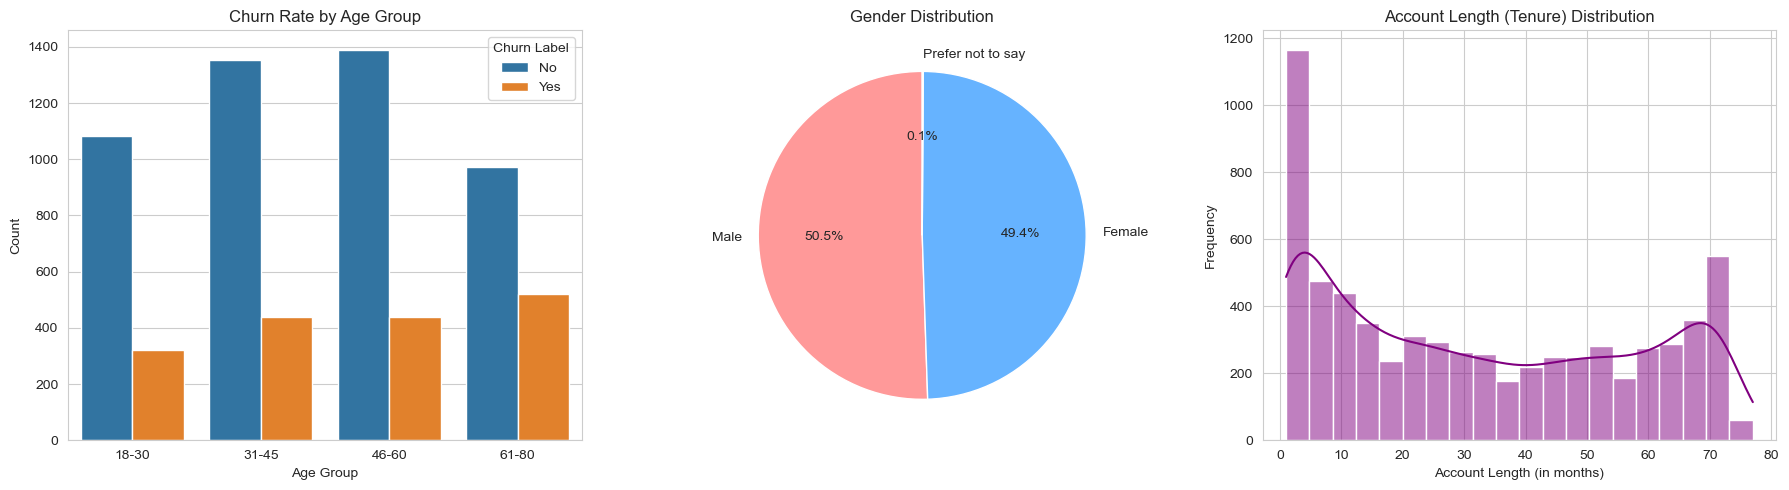

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Bar Chart - Churn Rate by Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])
sns.countplot(x="Age Group", hue="Churn Label", data=df, ax=axes[0])
axes[0].set_title("Churn Rate by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")

# 2️⃣ Pie Chart - Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
axes[1].set_title("Gender Distribution")

# 3️⃣ Histogram - Account Length Distribution
sns.histplot(df['Account Length (in months)'], bins=20, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Account Length (Tenure) Distribution")
axes[2].set_xlabel("Account Length (in months)")
axes[2].set_ylabel("Frequency")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


# Analysis of Customer Demographics Visualization
## 1️⃣ Churn Rate by Age Group (Bar Chart)

✅ Findings:

The 31-45 age group seems to have the highest number of churned customers.
The 18-30 group also has a significant churn rate, possibly indicating that younger customers are more likely to switch providers.
The 46-60 and 61-80 age groups have lower churn rates, suggesting that older customers may be more loyal or less likely to switch services.
✅ Possible Reasons:

Younger customers (18-45) may be more tech-savvy and willing to explore better deals from competitors.
Older customers (46+) might be more stable and accustomed to their service provider.
🔎 Actionable Insight:

The company could offer loyalty programs or customized retention plans targeting younger customers.

## 2️⃣ Gender Distribution (Pie Chart)
✅ Findings:

The distribution between male and female customers is relatively balanced.
If churn rates between genders differ significantly, it may indicate different service expectations.
✅ Possible Reasons:

If one gender has a higher churn rate, the company should investigate whether service plans, customer support, or marketing strategies are unintentionally favoring one group.
🔎 Actionable Insight:

Personalized marketing strategies could be tested for different genders to improve customer satisfaction and retention.
## 3️⃣ Account Length Distribution (Histogram)
✅ Findings:

Most customers have an account length between 0 and 50 months.
There's a sharp drop in customer numbers beyond 60 months, indicating fewer long-term subscribers.
✅ Possible Reasons:

Many customers may be switching providers within the first few years of service.
Long-term customers likely have contracts or loyalty perks, keeping them engaged.
🔎 Actionable Insight:

Encourage long-term commitment through discounts for multi-year contracts.
Offer renewal incentives to retain customers who are approaching 50+ months.


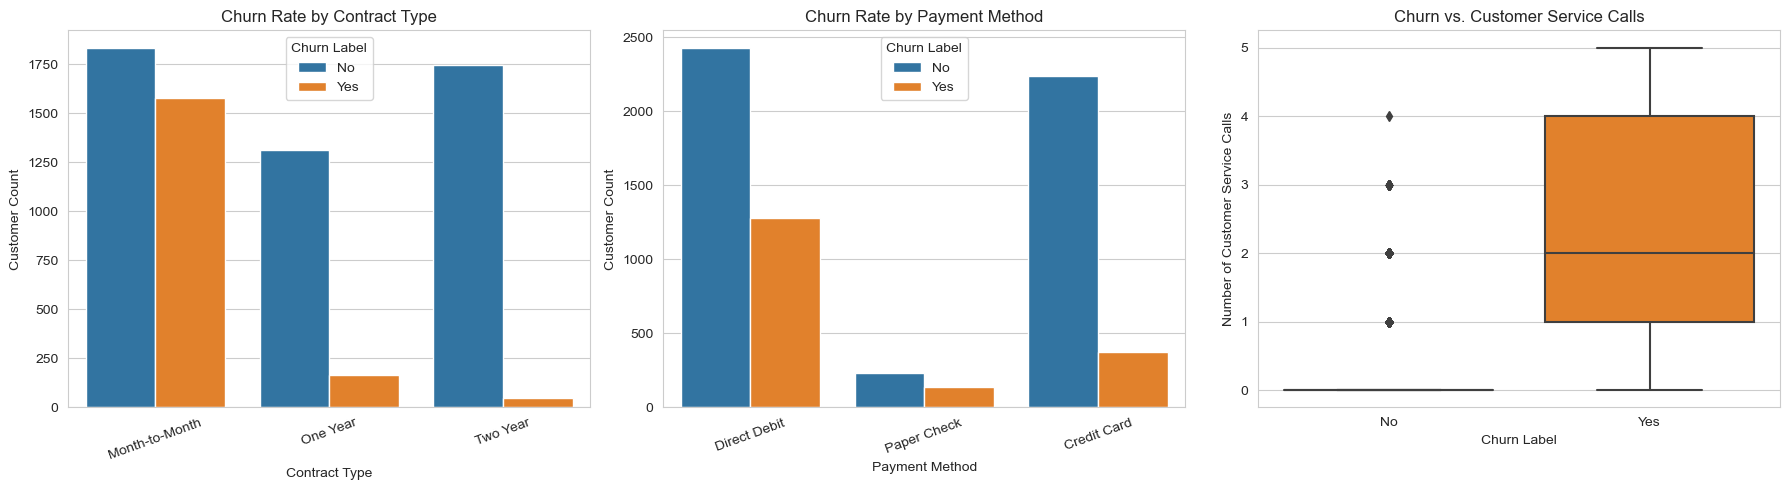

In [14]:

# Set figure size for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Churn Rate by Contract Type
sns.countplot(x="Contract Type", hue="Churn Label", data=df, ax=axes[0])
axes[0].set_title("Churn Rate by Contract Type")
axes[0].set_xlabel("Contract Type")
axes[0].set_ylabel("Customer Count")
axes[0].tick_params(axis='x', rotation=20)

# 2️⃣ Churn Rate by Payment Method
sns.countplot(x="Payment Method", hue="Churn Label", data=df, ax=axes[1])
axes[1].set_title("Churn Rate by Payment Method")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Customer Count")
axes[1].tick_params(axis='x', rotation=20)

# 3️⃣ Churn vs. Customer Service Calls
sns.boxplot(x="Churn Label", y="Customer Service Calls", data=df, ax=axes[2])
axes[2].set_title("Churn vs. Customer Service Calls")
axes[2].set_xlabel("Churn Label")
axes[2].set_ylabel("Number of Customer Service Calls")

# Adjust layout and display plots
plt.tight_layout()
plt.show()


# 📊 Churn Analysis: Contract Type, Payment Method, and Customer Service Calls  

The following visualizations analyze **churn behavior** based on **contract type, payment method, and customer service interactions**. These insights can help optimize retention strategies.  

---

## **1️⃣ Churn Rate by Contract Type**  

### ✅ What This Graph Shows:  
- **X-axis**: Contract types (**Month-to-Month, One-Year, Two-Year**).  
- **Y-axis**: Number of customers.  
- **Hue (Churn Label)**: Differentiates between **churned vs. retained customers**.  

### 📌 Key Observations:  
- **Month-to-Month contracts** have the **highest churn rate**.  
- **One-Year and Two-Year contracts** have significantly **lower churn rates**.  
- Customers on **longer contracts** are **less likely to churn**, likely due to contractual obligations or incentives.  

### 🔍 Business Insight & Action Plan:  
- **Encourage Month-to-Month customers** to switch to **longer-term contracts** with **discounts or perks**.  
- Implement **retention strategies** for month-to-month customers **at risk of churning**.  
- Offer **loyalty benefits** such as **free service months** or **early renewal discounts**.  

---

## **2️⃣ Churn Rate by Payment Method**  

### ✅ What This Graph Shows:  
- **X-axis**: Payment methods (**Credit Card, Bank Transfer, Electronic Check, Mailed Check**).  
- **Y-axis**: Number of customers.  
- **Hue (Churn Label)**: Differentiates between **churned vs. retained customers**.  

### 📌 Key Observations:  
- Customers using **Electronic Check** have the **highest churn rate**.  
- Customers using **Credit Card Auto-Pay or Bank Transfers** have the **lowest churn rates**.  
- **Electronic check users** may be **less committed**, prefer **manual payments**, or face **payment issues**.  

### 🔍 Business Insight & Action Plan:  
- **Promote Auto-Pay options** (Credit Card, Bank Transfer) to **reduce churn**.  
- Offer **discounts or incentives** for customers switching from **Electronic Check** to **Auto-Pay**.  
- Investigate **why electronic check users churn**—is it due to **payment failures, convenience, or another factor?**  

---

## **3️⃣ Churn vs. Customer Service Calls**  

### ✅ What This Graph Shows:  
- **X-axis**: Whether a customer **churned or not**.  
- **Y-axis**: Number of **customer service calls** made.  
- The **box plot** visualizes the **distribution of customer service calls** among churned and retained customers.  

### 📌 Key Observations:  
- Customers who **made more customer service calls** are **more likely to churn**.  
- The **median number of service calls** for churned customers is **higher** than that of retained customers.  
- Some **outliers exist**, indicating **some customers make excessive service calls before leaving**.  

### 🔍 Business Insight & Action Plan:  
- **High support calls → Warning sign for churn**.  
- Investigate **why customers call support**—are they facing **billing issues, service interruptions, or dissatisfaction?**  
- Implement **proactive customer service strategies** such as:  
  - Faster **issue resolution**.  
  - **Follow-up calls** to dissatisfied customers.  
  - Offering **special retention perks** for customers with multiple complaints.  

---

## **🎯 Overall Insights & Recommendations**  
✅ **Month-to-Month contracts have the highest churn** → Offer **longer contract incentives**.  
✅ **Electronic Check users churn the most** → Encourage **Auto-Pay adoption**.  
✅ **High customer service calls predict churn** → Improve **customer experience & issue resolution**.  

📌 Would you like additional **drill-down analyses**, such as **churn by age group or service type?**
